<center><h1>Assignment 5</h1></center>

## Details
1. Author :Akhilesh Murugkar
2. Roll Number : 33151
3. Batch : K9
4. Class : TE9

## Problem Statement
### Perform the following operations using Python on the Air quality and Heart Diseases data sets
1. Data cleaning
2. Data integration
3. Data transformation
4. Error correcting
5. Data model building

## Implementation details
1. Dataset URL : https://archive.ics.uci.edu/ml/datasets/Heart+Disease
2. Python version : 3.7.4
3. Imports :
    1. pandas
    2. numpy
    3. matplotlib.pyolot
    4. seaborn
    5. sklearn.linear_model.LogisticRegression

### Dataset details
1. This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them. In particular, the Cleveland database is the only one that has been used by ML researchers to this date. 
2. The "goal" field refers to the presence of heart disease in the patient. 
3. It is integer valued from 0 (no presence) to 4. Experiments with the Cleveland database have concentrated on simply attempting to distinguish presence (values 1,2,3,4) from absence (value 0).
4. The names and social security numbers of the patients were recently removed from the database, replaced with dummy values.

# Importing required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Loading the dataset

In [7]:
dataset = pd.read_csv("preprocessed_data.csv", index_col=0)

# Displaying metadata for dataset (Statistical)

In [8]:
dataset.shape

(682, 14)

In [9]:
dataset.isnull().sum()

age           0
sex           0
chest_pain    0
trestbps      0
cholestrol    0
fbs           0
restecg       0
thalach       0
exang         0
oldpeak       0
slope         0
ca            0
thal          0
num           0
dtype: int64

In [10]:
dataset.head(15)

,age,sex,chest_pain,trestbps,cholestrol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,0.714286,1,1,0.541667,0.386401,1.0,2.0,0.633803,0.0,0.890909,3.0,0.0,6.0,0
1,0.795918,1,4,0.666667,0.474295,0.0,2.0,0.338028,1.0,0.745455,2.0,3.0,3.0,1
2,0.795918,1,4,0.333333,0.379768,0.0,2.0,0.485915,1.0,0.945455,2.0,2.0,7.0,1
4,0.265306,0,2,0.416667,0.338308,0.0,2.0,0.788732,0.0,0.727273,1.0,0.0,3.0,0
5,0.571429,1,2,0.333333,0.391376,0.0,0.0,0.830986,0.0,0.618182,1.0,0.0,3.0,0
7,0.591837,0,4,0.333333,0.587065,0.0,0.0,0.725352,1.0,0.581818,1.0,0.0,3.0,0
8,0.714286,1,4,0.416667,0.421227,0.0,2.0,0.612676,0.0,0.727273,2.0,1.0,7.0,1
10,0.591837,1,4,0.500000,0.318408,0.0,0.0,0.619718,0.0,0.545455,2.0,0.0,6.0,0
11,0.571429,0,2,0.500000,0.487562,0.0,2.0,0.654930,0.0,0.709091,2.0,0.0,3.0,0
12,0.571429,1,3,0.416667,0.424544,1.0,2.0,0.577465,1.0,0.581818,2.0,1.0,6.0,1


# Observations :
1. There are 682 data points with 14 columns (including target column)
2. Null values are removed / replaced and dataset is scaled for numerical variables

# A) Feature selection

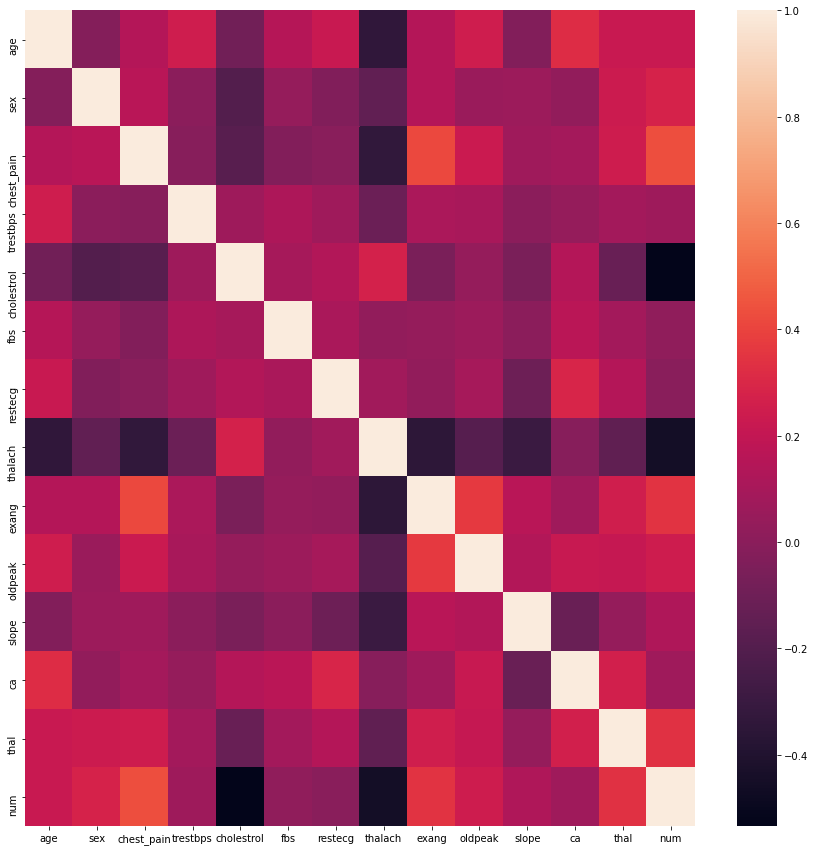

In [11]:
# Displaying heatmap for correlation matrix
fig = plt.figure(figsize=(15, 15))

# Adds subplot on position 1
ax = fig.add_subplot(111)

sns.heatmap(dataset.corr())
plt.show()

In [12]:
dataset.corr()

,age,sex,chest_pain,trestbps,cholestrol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
age,1.000000,-0.023624,0.145740,0.247017,-0.089696,0.154740,0.223164,-0.340013,0.146912,0.246984,-0.024984,0.321673,0.222136,0.225453
sex,-0.023624,1.000000,0.163370,0.003323,-0.199176,0.037774,-0.036257,-0.148256,0.147096,0.056113,0.063177,0.025315,0.233270,0.279127
chest_pain,0.145740,0.163370,1.000000,-0.009134,-0.182046,-0.026207,-0.002091,-0.334507,0.415408,0.229230,0.074927,0.093902,0.239361,0.434501
trestbps,0.247017,0.003323,-0.009134,1.000000,0.066543,0.120023,0.074495,-0.111419,0.118941,0.106618,0.000372,0.037259,0.084489,0.067330
cholestrol,-0.089696,-0.199176,-0.182046,0.066543,1.000000,0.097576,0.143226,0.272218,-0.054860,0.039519,-0.058404,0.148186,-0.125926,-0.533687
fbs,0.154740,0.037774,-0.026207,0.120023,0.097576,1.000000,0.113193,0.027782,0.036641,0.062684,0.001531,0.173009,0.084525,0.019112
restecg,0.223164,-0.036257,-0.002091,0.074495,0.143226,0.113193,1.000000,0.082551,0.024909,0.098591,-0.104784,0.289584,0.147006,-0.000813
thalach,-0.340013,-0.148256,-0.334507,-0.111419,0.272218,0.027782,0.082551,1.000000,-0.351493,-0.186849,-0.295667,-0.006800,-0.152521,-0.450693
exang,0.146912,0.147096,0.415408,0.118941,-0.054860,0.036641,0.024909,-0.351493,1.000000,0.369820,0.165464,0.076445,0.253110,0.345409
oldpeak,0.246984,0.056113,0.229230,0.106618,0.039519,0.062684,0.098591,-0.186849,0.369820,1.000000,0.139207,0.217945,0.214551,0.243727


# Note :
1. The above heatmap and the correlation table suggests that all of the data features are significantly correlated with the target variables
2. The following features are negatively correlated with the target variable :
    1. cholestrol 
    2. thalach
    
# Further action :
1. No feature drop is necessary due to significant correlation with target variable
2. The target variable is considered to be "num" (last column of the dataset)

# B) Building the data model

## 1) Understanding the target variable

In [13]:
# checking the unique values (categories in the dataset)
dataset.num.unique()

array([0, 1, 3, 2, 4], dtype=int64)

# Note :
1. The values beyond 0 are indicative of the fact that there is presence of heart disease

# Further action :
1. Binarize the target variable for the classes as presence or absence of heart disease

## 2) Binarizing the target variable

In [14]:
dataset["num"] = dataset["num"].replace([2, 3, 4], 1)

In [15]:
dataset.num.unique()

array([0, 1], dtype=int64)

## 3) Checking distribution of target variable

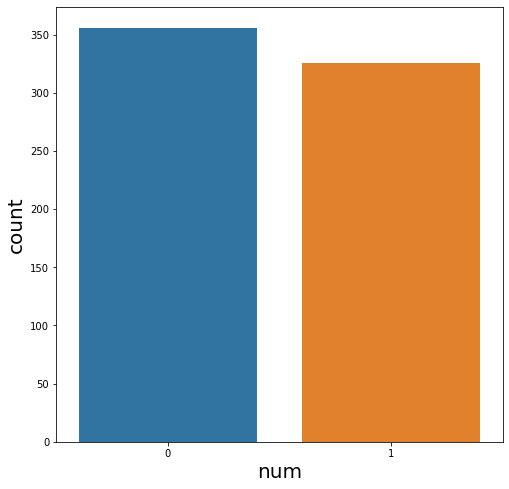

In [16]:
# Plotting the count plot for target variable
fig = plt.figure(figsize=(8, 8))

# Adds subplot on position 1
ax = fig.add_subplot(111)

plt.xlabel("num", fontsize=20)
plt.ylabel("count", fontsize=20)

sns.countplot(x=dataset.num)
plt.show()

In [17]:
# creating subsets for target variables for fair distribution in training and testing datasets
dataset_target_0 = dataset[dataset.num == 0]
dataset_target_1 = dataset[dataset.num == 1]
print("Shape of target 1 data : ", dataset_target_1.shape)
print("Shape of target 0 data : ", dataset_target_0.shape)

Shape of target 1 data :  (326, 14)
Shape of target 0 data :  (356, 14)


In [18]:
# Shuffling the data subsets
dataset_target_1 = dataset_target_1.sample(frac=1)
dataset_target_0 = dataset_target_0.sample(frac=1)

# Confirming shapes for no value loss
print("Shape of target 1 data : ", dataset_target_1.shape)
print("Shape of target 0 data : ", dataset_target_0.shape)

Shape of target 1 data :  (326, 14)
Shape of target 0 data :  (356, 14)


## 4) Creating training and testing data with 80:20 ratio

In [19]:
# Calculating 80 percent mark
target_0_mark = int(dataset_target_0.shape[0]*0.8)
target_1_mark = int(dataset_target_1.shape[0]*0.8)

# Generating train data
train_data = pd.concat(
    objs=[
        dataset_target_0.iloc[:target_0_mark, :],
        dataset_target_1.iloc[:target_1_mark, :]
    ],
    axis=0
)

# Generating test data
test_data = pd.concat(
    objs=[
        dataset_target_0.iloc[target_0_mark:, :],
        dataset_target_1.iloc[target_1_mark:, :]
    ],
    axis=0
)

# Shuffling the training and testing data
train_data = train_data.sample(frac=1)
test_data = test_data.sample(frac=1)

# Checking data shapes
print("Training data shape : ", train_data.shape)
print("Testing data shape  : ", test_data.shape)

Training data shape :  (544, 14)
Testing data shape  :  (138, 14)


## 5) Splitting training and testing inputs and targets

In [20]:
# Splitting training data
train_inputs = train_data.iloc[:, :-1]
train_targets = train_data.iloc[:, -1]

# Splitting testing data
test_inputs = test_data.iloc[:, :-1]
test_targets = test_data.iloc[:, -1]

# Checking shape of data
print("Train inputs shape : ", train_inputs.shape)
print("Train targets shape : ", train_targets.shape)
print("Test inputs shape : ", test_inputs.shape)
print("Test targets shape : ", test_targets.shape)

Train inputs shape :  (544, 13)
Train targets shape :  (544,)
Test inputs shape :  (138, 13)
Test targets shape :  (138,)


# 6) Building the data model

In [21]:
# Importing model
from sklearn.linear_model import LogisticRegression

In [22]:
logReg_model = LogisticRegression()

In [23]:
# Training the model
logReg_model.fit(train_inputs, train_targets)
print("Model trained")

Model trained


# 7) Checking accuracy of model on testing data

In [24]:
logReg_model.score(test_inputs, test_targets)

0.8333333333333334

In [25]:
logReg_model.score(train_inputs, train_targets)

0.8272058823529411

# Conclusion
1. The logistic regression model was fit on the given dataset
2. The model gave 89.85% accuracy on testing data and 82.53% accuracy on testing data